# 483-01 project 1

## Yi-Wei Lee
## Mina Moslehpour

### 1. Load and examine the Boston dataset’s features, target values, and description.


In [ ]:
from sklearn.datasets import load_boston

dataset_boston = load_boston()

Descr = dataset_boston['DESCR']

print(Descr)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
import pandas as pd

# Independent variables (i.e. features)
df_boston_features = pd.DataFrame(data=dataset_boston.data,
                                  columns=dataset_boston.feature_names)
df_boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Dependent variables (i.e. targets)
df_boston_target = pd.DataFrame(data=dataset_boston.target,
                                columns=['MEDV'])
df_boston_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 2. Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

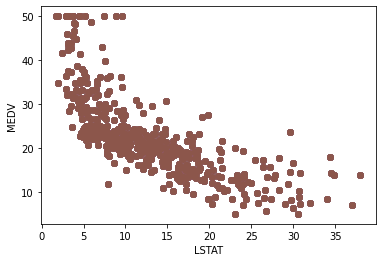

In [ ]:
import matplotlib.pyplot as plt


features = df_boston_features['LSTAT']
#target = df_boston_target['MEDV']

#plt.figure(figsize=(25,25))
for i,col in enumerate(features):
    #plt.subplot(2, 2, i+1)
    x = df_boston_features['LSTAT']
    y = df_boston_target['MEDV']
    plt.scatter(x,y,marker="o")
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')

### 3. Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

dataset = pd.DataFrame(data=df_boston_features['LSTAT'], columns=['LSTAT'])
dataset['MEDV'] = df_boston_target['MEDV']

lr = LinearRegression()
x = dataset[['LSTAT']]
y = dataset[['MEDV']] #target

lr.fit(x,y)

print("intercept_: ", lr.intercept_);
print("coef_ : ", lr.coef_);

intercept_:  [34.55384088]
coef_ :  [[-0.95004935]]


### 4. Use the predict() method of the model to find the response for each value of the LSTAT attribute in the dataset. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the model

In [ ]:
from sklearn.metrics import mean_squared_error

predictValue = lr.predict(x)
print("average squared loss: ", mean_squared_error(y ,predictValue, squared = True))

average squared loss:  38.48296722989415


### 5. Add a line to your scatter plot representing the least squares fit to the data. How well does the model fit the data?

Text(0, 0.5, 'MEDV')

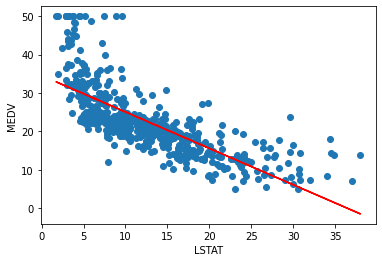

In [ ]:
plt.scatter(x, y)
plt.plot(x, predictValue, color = "red")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#### The model fit the data well.

### 6. Now repeat experiments (3) and (4) using all 13 input features at the same time. How does the average loss change?

In [ ]:
from sklearn.model_selection import train_test_split

X = df_boston_features.values

Y = df_boston_target[['MEDV']].values


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

#fit
model = LinearRegression()
reg = model.fit(X_train,Y_train)

#get new predicted
predictValue = reg.predict(X)
print("average squared loss: ", mean_squared_error(Y ,predictValue, squared = True))

#for feature in df_boston_features:
    
    #dataset = pd.DataFrame(data=df_boston_features[feature], columns=[feature])
    #dataset['MEDV'] = df_boston_target['MEDV']
    
    #lr = LinearRegression()
    #x = dataset[[feature]]
    #y = dataset[['MEDV']] #target

    #lr.fit(x,y)
    
    #print(feature)
    #print("intercept_: ", lr.intercept_);
   # print("coef_ : ", lr.coef_);
    
   #predictValue = lr.predict(x)
 #print("average squared loss: ", mean_squared_error(x ,predictValue, squared = True))

average squared loss:  22.173300241129716


#### expect AGE, TAX, and B, the other average squared loss are all within similar range.

### 7. Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?

#### For coef_ value that is positive (ZN, CHAS, RM, DIS, B) will be desirable in a home. Other that have negative coef_ value (CRIM, ZN, INDUS, NOX, AGE, RAD, TAX, PTRATIO, LSTAT) will detract from its value.

### 8. Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.

In [ ]:
#dataset = pd.DataFrame(data=df_boston_features[feature], columns=[feature])
#coeff_attributes = pd.DataFrame(reg.coef_,df_boston_features.columns, columns=['coeff_attributes'])  
#print(coeff_attributes)
 

#coeff_attributes = pd.DataFrame(reg.coef_*1000, df_boston_features.columns, columns=["Coefficient_Attributes"])  
#print(coeff_attributes)
# Selecting all column vectors from features dataset (X)
X_multi_comp = df_boston_features.values

# Selecting all MEDV data from target values dataset (Y)
Y_multi_comp = df_boston_target['MEDV'].values

X_train_multi,X_test,Y_train_multi,Y_test = train_test_split(X_multi_comp,Y_multi_comp,test_size = 0.2, random_state = 0)

# Using the fit() method for a linear regression model
lr = LinearRegression()

lr.fit(X_train_multi, Y_train_multi)

#model.coef_.shape
#for i in range(len(model.coef_)):
coeff_attributes = pd.DataFrame(lr.coef_*1000, df_boston_features.columns, columns=["Coefficient_Attributes"]) 

#print(coeff_attributes)


for i, df_boston_features in enumerate(coeff_attributes.index):
  print("{} change the median value of the home: ${}\n".format(df_boston_features, round(coeff_attributes.iloc[i,0], 2)))





CRIM change the median value of the home: $-119.44

ZN change the median value of the home: $44.78

INDUS change the median value of the home: $5.49

CHAS change the median value of the home: $2340.8

NOX change the median value of the home: $-16123.6

RM change the median value of the home: $3708.71

AGE change the median value of the home: $-3.12

DIS change the median value of the home: $-1386.4

RAD change the median value of the home: $244.18

TAX change the median value of the home: $-10.99

PTRATIO change the median value of the home: $-1045.92

B change the median value of the home: $8.11

LSTAT change the median value of the home: $-492.79



### 9. Based on the amount of change in the value of the home, which features don’t seem to be important?

#### Tax and B seems to be less important becuase it does not effect that much